# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4 - Метод k-средних, предобработка признаков


###### <hr\>
**Общая информация**

**Срок сдачи:** 28 ноября 2018, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 28 ноября, -4 балла после 06:00 5 декабря, -6 баллов после 06:00 12 декабря, -8 баллов после 19 декабря

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Имплементация K-means

Пользуясь наработками выше, имплементируйте метод k-means.  
При инициализации необходимо задавать количество кластеров, функцию расстояния между кластерами (для оригинального k-means - евклидово расстояние) и начальное состояние генератора случайных чисел.

После обучения, среди атрибутов класса `Kmeans` должны появится
* Метки кластеров для объектов
* Координаты центройдов кластеров

k-means - это алгоритм **кластеризации**, а не классификации, а посему метод `.predict()` в нем фактически не нужен, но он может возвращать метки ближайшего кластера для объектов.

###### Задание 1 (2 баллов)
Имплементируйте метод k-means. Задание считается выполненным, если Ваша реализация работает быстрее реализации из sklearn.

Теория для выполнения задания 2 и 3 остаётся на самостоятельное изучение. Теории немного и она совсем простая.

###### Задание 2 (2 балла)
Имплементируйте класс MiniBatchKMeans, который является классом наследником Kmeans.

###### Задание 3 (2 балла)
Превратите k-means в k-means++. Для этого нужно реализовать метод в классе Kmeans, который будет инициализировать более "хорошие" значения центроидов. Чтобы использовался метод k-means++, в параметр init необходимо передать строковое значение 'k-means' (по умолчанию 'random').

###### Задание 4 (2 балла)
В пункте "Проверка корректности метода" нужно нарисовать графики, которые показывают зависимость времени выполнения алгоритма от количества сэмплов. Графики должны быть  нарисованы для различных комбинаций реализаций алгоритма (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). График достаточно построить на 5-10 точках.

###### Задание 5 (2 балла)
В пункте "Применение K-means на реальных данных" нужно сравнить различные реализации k-means (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). После чего написать вывод, в котором должно быть объяснение того, почему один алгоритм оказался лучше остальных или почему не было выявлено лучшего алгоритма.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл
<hr\>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import pairwise_distances

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [35]:
#%%pycodestyle


class MyKmeans:

    def __init__(self, k=2, metric='euclidean', max_iter=300,
                 random_state=None, init='random'):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """
        self.init = init
        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter

    def Loss(self, X):
        dists = pairwise_distances(X, self.centroids, metric=self.metric)
        n = np.argmin(dists, axis=1)
        self.labels = n
        for i in range(self.k):
            self.centroid_sizes[i] = X[(self.labels == i)].shape[0]
            self.centroids[i] = X[(self.labels == i)].mean(axis=0)
        sizes = dists[[range(dists.shape[0]), n]]
        sqsizes = sizes ** 2
        sums = np.zeros(self.k)
        for i in range(self.k):
            sums[i] = sqsizes[(self.labels == i)].sum()
            if (sums[i] > 0):
                sums /= self.centroid_sizes[i]
            else:
                rand_elemi = random.randint(0, X.shape[0])
                self.labels[rand_elemi] = i
                self.centroids[i] = rand_elemi
        return sums.sum()

    def initCl(self, X):
        if (self.init == 'random'):
            self.centroids = X[np.random.randint(0, X.shape[0], self.k)]
        else:
            self.centroids[0] = X[np.random.randint(0, X.shape[0], 1)]
            for i in range(1, self.k):
                dists = pairwise_distances(
                    X, self.centroids[:i], metric=self.metric)
                dists = np.min(dists, axis=1)
                dists = (dists + 0.001) / dists.sum()
                hm = random.random()
                j = -1
                while hm > 0:
                    j += 1
                    hm -= dists[j]
                self.centroids[i] = X[j]
        return self

    def batch_generator(self, X):
        return X

    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """

        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])

        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))
        self.centroid_sizes = np.zeros(self.k)
        # Your Code Here
        # ...
        if y is not None:
            self.labels = y
            for i in range(self.k):
                self.centroids[i] = X[(self.labels == i)].mean(axis=0)
            return self
        self.initCl(X)
        dists = pairwise_distances(X, self.centroids, metric=self.metric)
        self.labels = np.argmin(dists, axis=1)
        X_b = self.batch_generator(X)
        l1 = self.Loss(X_b)
        l2 = self.Loss(X_b)
        i = 0
        while ((i < self.max_iter) and abs(l1 - l2) < 0.00001):
            l1 = l2
            l2 = self.Loss(X_b)
            i += 1
        self.Loss(X)
        return self

    def predict(self, X, y=None):
        """
        Процедура предсказания кластера

        Возвращает метку ближайшего кластера для каждого объекта
        """
        dists = pairwise_distances(X, self.centroids, metric=self.metric)
        return np.argmin(dists, axis=0)


class MiniBatchKMeans(MyKmeans):
    def __init__(self, k=2, metric='euclidean', max_iter=300,
                 random_state=None, init='random', batch_size=100):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """
        self.init = init
        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        self.batch_size = batch_size

    def batch_generator(self, X):
        ind_shuf = np.arange(X.shape[0])
        np.random.shuffle(ind_shuf)
        X_b = X[ind_shuf[:self.batch_size]]
        return X_b

### Проверка корректности метода

Перед тем как применять алгоритм на реальных данных, нужно испытать его на простых "игрушечных" данных.

Если алгоритм реализован правильно, то метод должен идеально разбивать на 3 кластера данные ниже. Проверьте это.

ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [36]:
from sklearn.datasets import make_blobs

In [37]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)
#print(X)

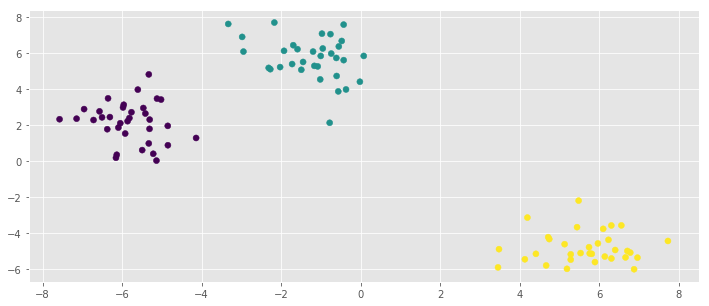

In [38]:
plt.scatter(X[:,0], X[:, 1], c=y)

Проверьте Вашу имплементацию на простых данных (без этого пункта ДЗ не считается выполненным).   
КОММЕНТАРИИ НЕ СТИРАТЬ!

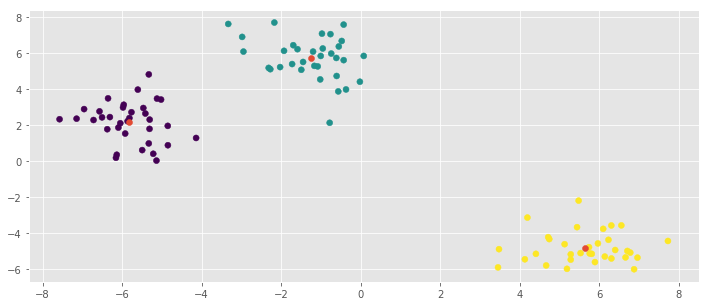

In [39]:
## Работоспособность MyKmeans
my_clf = MyKmeans(k=3)
my_clf.fit(X)
plt.scatter(X[:,0], X[:, 1], c=my_clf.labels)
plt.scatter(my_clf.centroids[:,0], my_clf.centroids[:,1])

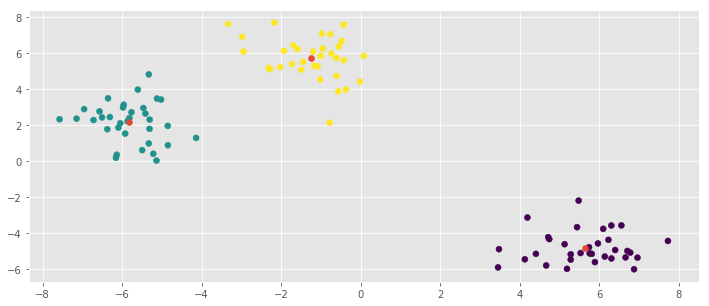

In [40]:
## Работоспособность MyKMeans++
my_clf = MyKmeans(k=3, init="kmeans++")
my_clf.fit(X)
plt.scatter(X[:,0], X[:, 1], c=my_clf.labels)
plt.scatter(my_clf.centroids[:,0], my_clf.centroids[:,1])

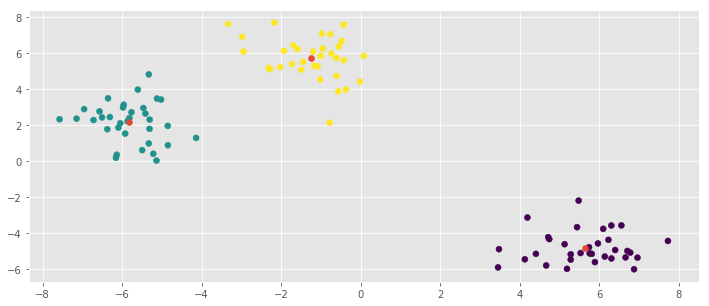

In [41]:
## Работоспособность MyKmeans с MiniBatchMyKmeans
my_clf = MiniBatchKMeans(k=3)
my_clf.fit(X)
plt.scatter(X[:,0], X[:, 1], c=my_clf.labels)
plt.scatter(my_clf.centroids[:,0], my_clf.centroids[:,1])

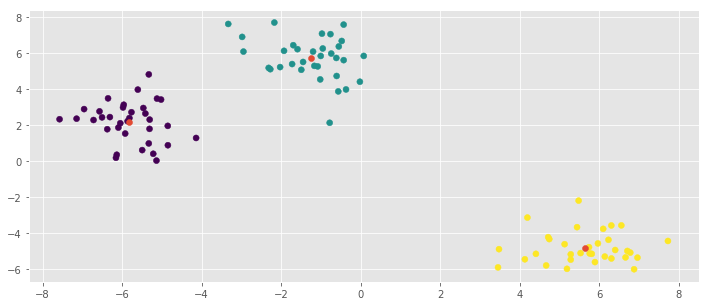

In [42]:
## Работоспособность MyKmeans++ с MiniBatchMyKmeans
my_clf = MiniBatchKMeans(k=3, init="kmeans++")
my_clf.fit(X)
plt.scatter(X[:,0], X[:, 1], c=my_clf.labels)
plt.scatter(my_clf.centroids[:,0], my_clf.centroids[:,1])

In [50]:
import time

In [51]:
## Время выполнения алгоритма Kmeans из sklearn
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=3)

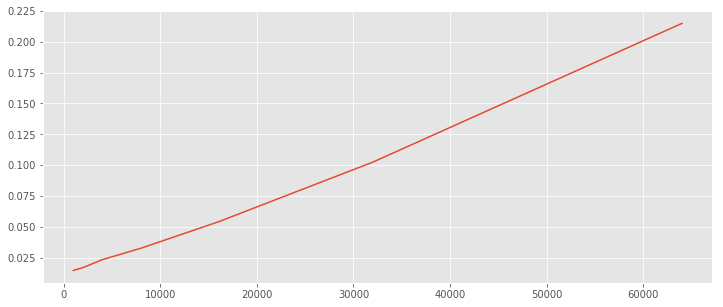

In [52]:
i = 0
n_samples = 1000
times = []
samples = []
while (i < 7):
    i += 1
    t = 0
    for j in range(100):
        X, y = make_blobs(n_samples=n_samples, n_features=2, centers=3, cluster_std=1, 
            center_box=(-10.0, 10.0), shuffle=False, random_state=None)
        start_time = time.time()
        clf.fit(X)
        t += time.time() - start_time 
    times = times + [t / 100]
    samples = samples + [n_samples]
    n_samples *= 2
plt.plot(samples ,times)
plt.show()

In [53]:
## Время выполнения алгоритма MyKmeans
my_clf = MyKmeans(k = 3, init="random")

/home/dmitry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: Mean of empty slice.
/home/dmitry/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


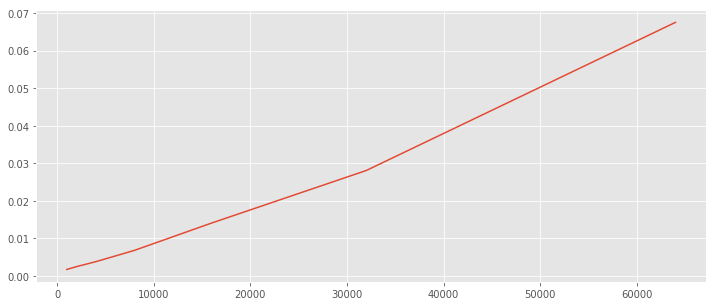

In [54]:
i = 0
n_samples = 1000
times = []
samples = []
while (i < 7):
    i += 1
    t = 0
    for j in range(100):
        X, y = make_blobs(n_samples=n_samples, n_features=2, centers=3, cluster_std=1, 
            center_box=(-10.0, 10.0), shuffle=False, random_state=None)
        start_time = time.time()
        my_clf.fit(X)
        t += time.time() - start_time 
    times = times + [t / 100]
    samples = samples + [n_samples]
    n_samples *= 2
plt.plot(samples ,times)
plt.show()

In [55]:
## Время выполнения алгоритма MyKmeans++
my_clf = MyKmeans(k = 3, init="kmeans++")

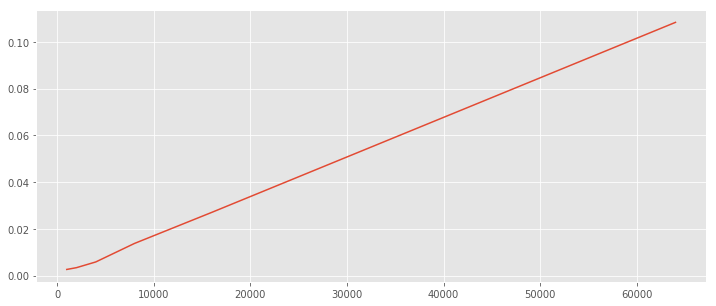

In [56]:
i = 0
n_samples = 1000
times = []
samples = []
while (i < 7):
    i += 1
    t = 0
    for j in range(100):
        X, y = make_blobs(n_samples=n_samples, n_features=2, centers=3, cluster_std=1, 
            center_box=(-10.0, 10.0), shuffle=False, random_state=None)
        start_time = time.time()
        my_clf.fit(X)
        t += time.time() - start_time 
    times = times + [t / 100]
    samples = samples + [n_samples]
    n_samples *= 2
plt.plot(samples ,times)
plt.show()

In [57]:
## Время выполнения алгоритма MyKmeans с MiniBatchMyKmeans
my_clf = MiniBatchKMeans(k = 3, init="random")

/home/dmitry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: Mean of empty slice.
/home/dmitry/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


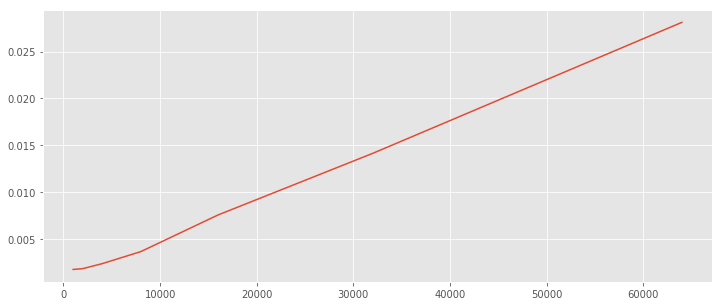

In [58]:
i = 0
n_samples = 1000
times = []
samples = []
while (i < 7):
    i += 1
    t = 0
    for j in range(100):
        X, y = make_blobs(n_samples=n_samples, n_features=2, centers=3, cluster_std=1, 
            center_box=(-10.0, 10.0), shuffle=False, random_state=None)
        start_time = time.time()
        my_clf.fit(X)
        t += time.time() - start_time 
    times = times + [t / 100]
    samples = samples + [n_samples]
    n_samples *= 2
plt.plot(samples ,times)
plt.show()

In [59]:
## Время выполнения алгоритма  MyKmeans++ с MiniBatchMyKmeans
my_clf = MiniBatchKMeans(k = 3, init="kmeans++")

/home/dmitry/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: Mean of empty slice.
/home/dmitry/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


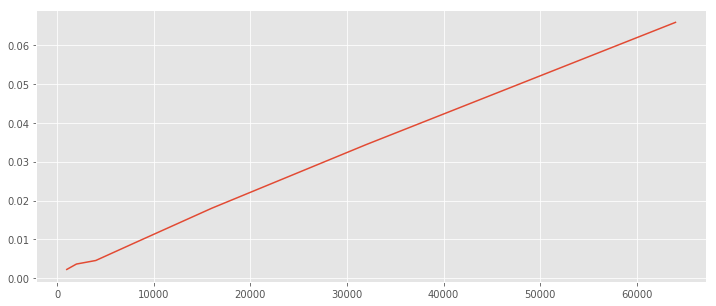

In [60]:
i = 0
n_samples = 1000
times = []
samples = []
while (i < 7):
    i += 1
    t = 0
    for j in range(100):
        X, y = make_blobs(n_samples=n_samples, n_features=2, centers=3, cluster_std=1, 
            center_box=(-10.0, 10.0), shuffle=False, random_state=None)
        start_time = time.time()
        my_clf.fit(X)
        t += time.time() - start_time 
    times = times + [t / 100]
    samples = samples + [n_samples]
    n_samples *= 2
plt.plot(samples ,times)
plt.show()

# Применение K-means на реальных данных

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.  (без этого пункта задание не считается выполненным).   
ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [15]:
df_sns = pd.read_csv('snsdata.csv', sep=',')
df_sns.head()
df = df_sns.drop(['gradyear', 'gender', 'age', 'friends'], axis=1)
#df.shape
#df.head

Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [16]:
X = np.array(df).astype(float)
X = (X - X.mean(axis=0).reshape(1, -1)) / (np.abs(X.std(axis=0)) + 0.0001).reshape(1, -1)

In [17]:
## MyKMeans
my_clf = MyKmeans(k=9)
clf = KMeans(n_clusters=9, init='random')
my_clf.fit(X)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
print(*my_clf.centroid_sizes)

16561.0 1744.0 2834.0 819.0 1991.0 321.0 580.0 3092.0 2058.0


In [19]:
for i in range(9):
    print((i == clf.labels_).sum())

20172
926
834
1287
583
432
974
4791
1


In [20]:
#my_clf.centroids

In [21]:
#clf.cluster_centers_

In [22]:
my_clf.labels

array([0, 1, 0, ..., 0, 0, 0])

In [23]:
df.loc[:, 'labels'] = my_clf.labels
clusters = df.groupby('labels').mean()
clusters
for k in range(9):
    print(k, clusters.loc[k].sort_values(ascending=False).head(5))
    print('size='+str(my_clf.centroid_sizes[k]))

0 music       0.393153
god         0.289656
dance       0.202041
football    0.160679
soccer      0.148723
Name: 0, dtype: float64
size=16561.0
1 basketball    1.301606
dress         1.248853
dance         0.885894
music         0.774083
hair          0.613532
Name: 1, dtype: float64
size=1744.0
2 shopping    1.556104
music       0.822512
dance       0.712773
hair        0.636203
mall        0.555399
Name: 2, dtype: float64
size=2834.0
3 hair      3.472527
sex       2.782662
music     2.401709
die       1.757021
kissed    1.639805
Name: 3, dtype: float64
size=819.0
4 rock     1.805123
music    1.303365
god      0.598192
dance    0.492717
band     0.486690
Name: 4, dtype: float64
size=1991.0
5 god       5.333333
church    3.984424
jesus     2.292835
music     1.021807
bible     0.859813
Name: 5, dtype: float64
size=321.0
6 mall     3.431034
cute     1.318966
hair     1.236207
music    1.058621
dance    0.967241
Name: 6, dtype: float64
size=580.0
7 music    1.563713
cute     1.342820
ban

In [24]:
clf.labels_

array([0, 7, 0, ..., 0, 0, 0], dtype=int32)

In [25]:
## MyKMeans++
my_clf = MyKmeans(k=9, init='kmeans++')
clf = KMeans(n_clusters=9)
my_clf.fit(X)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
print(*my_clf.centroid_sizes)

3461.0 3365.0 1345.0 16637.0 1357.0 206.0 556.0 732.0 2341.0


In [27]:
for i in range(9):
    print((i == clf.labels_).sum())

4623
2224
19514
494
1
850
792
573
929


In [28]:
my_clf.labels

array([3, 1, 3, ..., 3, 3, 1])

In [29]:
clf.labels_

array([2, 6, 2, ..., 2, 2, 2], dtype=int32)

In [30]:
df.loc[:, 'labels'] = my_clf.labels
clusters = df.groupby('labels').mean()
clusters
for k in range(9):
    print(k, clusters.loc[k].sort_values(ascending=False).head(5))
    print('size='+str(my_clf.centroid_sizes[k]))

0 music    2.225657
band     1.301069
dance    0.610517
rock     0.541173
god      0.469806
Name: 0, dtype: float64
size=3461.0
1 basketball    1.195840
softball      0.664190
music         0.634473
god           0.611293
hair          0.565527
Name: 1, dtype: float64
size=3365.0
2 church      2.744981
god         1.833457
jesus       0.910037
music       0.880297
shopping    0.531599
Name: 2, dtype: float64
size=1345.0
3 music       0.326381
god         0.246920
cute        0.201178
shopping    0.184709
dance       0.173108
Name: 3, dtype: float64
size=16637.0
4 football      2.487841
music         0.627856
basketball    0.540899
soccer        0.488578
god           0.397200
Name: 4, dtype: float64
size=1357.0
5 god       5.082524
sex       3.393204
blonde    1.917476
hair      1.907767
music     1.902913
Name: 5, dtype: float64
size=206.0
6 dance       6.300360
music       1.138489
hair        0.803957
cute        0.694245
shopping    0.674460
Name: 6, dtype: float64
size=556.0
7 hai

In [31]:
## MyKMeans с MiniBatchMyKMeans
my_clf = MiniBatchKMeans(k=9, batch_size=2000)
my_clf.fit(X)
print(*my_clf.centroid_sizes)
my_clf.labels

5810.0 3218.0 1106.0 505.0 398.0 681.0 518.0 2256.0 15508.0


array([8, 5, 0, ..., 8, 8, 0])

In [32]:
df.loc[:, 'labels'] = my_clf.labels
clusters = df.groupby('labels').mean()
clusters
for k in range(9):
    print(k, clusters.loc[k].sort_values(ascending=False).head(5))
    print('size=' + str(my_clf.centroid_sizes[k]))

0 music    1.780207
dance    0.597246
god      0.519621
band     0.431325
hair     0.398623
Name: 0, dtype: float64
size=5810.0
1 shopping      1.512119
basketball    0.776569
music         0.699503
mall          0.644189
dance         0.601616
Name: 1, dtype: float64
size=3218.0
2 cheerleading    1.933092
die             0.958409
dance           0.913201
hair            0.744123
music           0.709765
Name: 2, dtype: float64
size=1106.0
3 cute     3.526733
hair     2.271287
dance    1.419802
mall     1.364356
music    1.130693
Name: 3, dtype: float64
size=505.0
4 band        6.005025
marching    1.846734
music       1.419598
god         0.575377
dance       0.507538
Name: 4, dtype: float64
size=398.0
5 hair      3.249633
music     3.076358
sex       2.767988
rock      2.553598
kissed    1.593245
Name: 5, dtype: float64
size=681.0
6 hot      2.716216
music    0.990347
hair     0.918919
dance    0.793436
cute     0.685328
Name: 6, dtype: float64
size=518.0
7 god         1.503103
sport

In [33]:
## MyKMeans++ с MiniBatchMyKMeans
my_clf = MiniBatchKMeans(k=9, init='kmeans++', batch_size=2000)
my_clf.fit(X)
print(*my_clf.centroid_sizes)
my_clf.labels

1466.0 1014.0 1263.0 22290.0 1149.0 17.0 264.0 969.0 1568.0


array([3, 2, 3, ..., 3, 3, 3])

In [34]:
df.loc[:, 'labels'] = my_clf.labels
clusters = df.groupby('labels').mean()
clusters
for k in range(9):
    print(k, clusters.loc[k].sort_values(ascending=False).head(5))
    print('size=' + str(my_clf.centroid_sizes[k]))

0 cute        1.530696
shopping    1.373124
mall        1.178035
music       1.004093
hair        0.948158
Name: 0, dtype: float64
size=1466.0
1 hot         1.663708
baseball    1.156805
dance       0.975345
music       0.873767
hair        0.609467
Name: 1, dtype: float64
size=1014.0
2 dress    1.330166
dance    0.929533
music    0.914489
drunk    0.821853
hair     0.753761
Name: 2, dtype: float64
size=1263.0
3 music       0.599058
god         0.362898
dance       0.300763
shopping    0.240601
hair        0.222118
Name: 3, dtype: float64
size=22290.0
4 basketball    2.587467
volleyball    1.668407
softball      0.947781
music         0.772846
god           0.584856
Name: 4, dtype: float64
size=1149.0
5 sex            12.294118
hair           10.000000
music           6.647059
drugs           3.117647
abercrombie     3.117647
Name: 5, dtype: float64
size=17.0
6 band        5.939394
marching    2.401515
music       1.500000
dance       0.575758
god         0.537879
Name: 6, dtype: float

In [35]:
## Вывод
Интерпретация kmeans++ (2ой) 
0ой кластер музыканты 
1ый кластер баскетболисты + софтболисты(по гуглу это что-то типо бейсбола)
2ой верующие
3ий очень большой кластер, и признаки сильно усреднены, но в большинстве инетресуются музыкой и богом
4ый любители американского футбола
5ый очень маленький кластер; инересуются богом и еще сэксом(на них большой разрыв)
6ой любители потанцевать
7ой интересуются музыкой бейсболом волосами и сэксом(наверное те у кого нет особых увлечений)
8ой возможно любители ходить по салонам красоты


In [ ]:
на мой взгляд на этих данных все алогритмы проявили себе кроме miniBatch kmeans++ проявили себя
+- одинаково(элементоы распределены по кластерам примерно одинаково, есть один очень большой кластер и пара маленькх),
но на других запусках miniBatch kmeans++ не был так плох, поэтому на мой взгляд все алгоритмы примерно равны 
и сильно зависят от качества рандомной инициализации
